# Hotel Customer Segmentation - EDA
##### Lindsey Robertson

## Objective

Investigate outliers, analyze relationships between feaetures and visualize correlations observed. Tell a data story, identify a flow process and KPIs to focus on. Identify the data problem, types of models appropriate for problem, use cases and user story for the iniative. Explore segmentation possibilities. 

## Data

This real-world customer dataset with 31 variables describes
83,590 instances (customers) from a hotel in Lisbon, Portugal.
Instances include; customer personal, behavioral,
demographic, and geographical information for 3 full years.
The dataset can be found on Kaggle [here].(https://www.kaggle.com/datasets/nantonio/a-hotels-customers-dataset)

Kaggle dataset origin, domain assumptions and data collection information: 

Nuno Antonio, Ana de Almeida, Luis Nunes. A hotel's customer's personal, behavioral, demographic, and geographic dataset from Lisbon, Portugal (2015-2018). Data in Brief 33(2020)106583, 24(November), 2020. URL: https://www.sciencedirect.com/journal/data-in-brief.


## Data Assumptions

* Some hotels have a policy of creating a profile for each guest companion(adult or children) only in particular cases and with authorization at times. 
* Typically a customer profile is created by one of three things:
    - customer's first checked-out at the hotel
    - customer's first cancelation
    - customer's first no-show
* Sometimes there are more than one profile for the same customer
* Only after the customer's first stay can hotels confirm the guest's personal details, such as nationality.

## Hypothesis

We can segment these customers based on recency, frequency and monotary value, predict their future value. 

A separate hypothesis is that we can predict a customer's cancelation or no show with these customer records. 

## Questions to guide analysis:

Revenue:
1) Does missing revenue need to be imputed? If so how? 
2) Is it bad for CLV prediction to have so much missing revenue data?
3) Can we leave zero reveues reported for our analysis even though it is a high percentage of customers?

Age:
1) Will the under 5% zero age affect our analysis?
2) 

What features show potential for modeling?

How can we better segment the customers for prediction?

KPIs
1) What are the key metrics that will solve our objective?
2) What are the metrics that will evalutate successful initative?

Business data problem
1) What type of business/data problems can be solved?
2) What are bussiness use cases?
3) What is the user story?
4) What kind of models and processes serves this problem best?

## Process:

1) [Categorical feature analysis]
2) [Numerical feature analysis]
3) [Feature relationship analysis: scatter,correlation heatmap, pairwise, pearson]
4) [RFM analysis and scoring]
5) [Tableau data story]
    * KPIs and Evaluation
    * DFD
    * Use case and user story


## Import Libraries

In [ ]:
pip install plotly

In [288]:
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

## Import data

Import previous wrangling notebook progress

In [5]:
from IPython.utils import io
with io.capture_output() as captured:
    %run 1_wrangling.ipynb

## Categorical Analysis

Create a separate dataframe which has only Categorical Variables


In [6]:
data_cat = Data.select_dtypes(include = 'object').copy()
data_cat.head(2).T

,0,1
Nationality,PRT,PRT
NameHash,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...
DocIDHash,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...
DistributionChannel,Corporate,Travel Agent/Operator
MarketSegment,Corporate,Travel Agent/Operator


The Hash information will be of little use in our analysis and should be removed. The other's will be benifiical information. 

### Remove unneeded categorical features

The Hash columns are to handle name input processing. I can't see a use for these in our modeling solutions at the moment. Also, this feature is a randomly assigned string that is generated by an name input document. I have a hard time seeing how this could  feature could offer a relationship to customer value and behavior that will prove useful beyond what the other features can offer.  

In [34]:
clean_data = Data.drop(['NameHash', 'DocIDHash'], axis=1)

In [47]:
clean_data.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,0.0,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Nationality

In [7]:
nationality = Data['Nationality'].nunique()
print(nationality)

188


Let's look at the top nationalities of our customer base.

In [138]:
top_nationality = Data['Nationality'].value_counts().head(20)
fig = px.pie( values = top_nationality.values,names=top_nationality.keys(), title='Distributoion of Nationalities')
fig.show()


In [99]:
 top_nationality


FRA    12422
PRT    11597
DEU    10232
GBR     8656
ESP     4902
USA     3429
ITA     3365
BEL     3119
BRA     2902
NLD     2725
CHE     2108
IRL     1996
CAN     1524
AUT     1489
SWE     1231
ISR      900
CHN      891
NOR      795
POL      760
AUS      723
Name: Nationality, dtype: int64

In [178]:
top_nationalities = Data.sort_values(by= ['Nationality'])

top_nationalities = top_nationalities[top_nationalities.groupby('Nationality').cumcount() > 1000]

In [185]:
len(top_nationalities.Nationality.value_counts())



15

[Text(0, 0, '488'),
 Text(0, 0, '2118'),
 Text(0, 0, '1901'),
 Text(0, 0, '523'),
 Text(0, 0, '1107'),
 Text(0, 0, '9231'),
 Text(0, 0, '3901'),
 Text(0, 0, '11421'),
 Text(0, 0, '7655'),
 Text(0, 0, '995'),
 Text(0, 0, '2364'),
 Text(0, 0, '1724'),
 Text(0, 0, '10596'),
 Text(0, 0, '230'),
 Text(0, 0, '2428')]

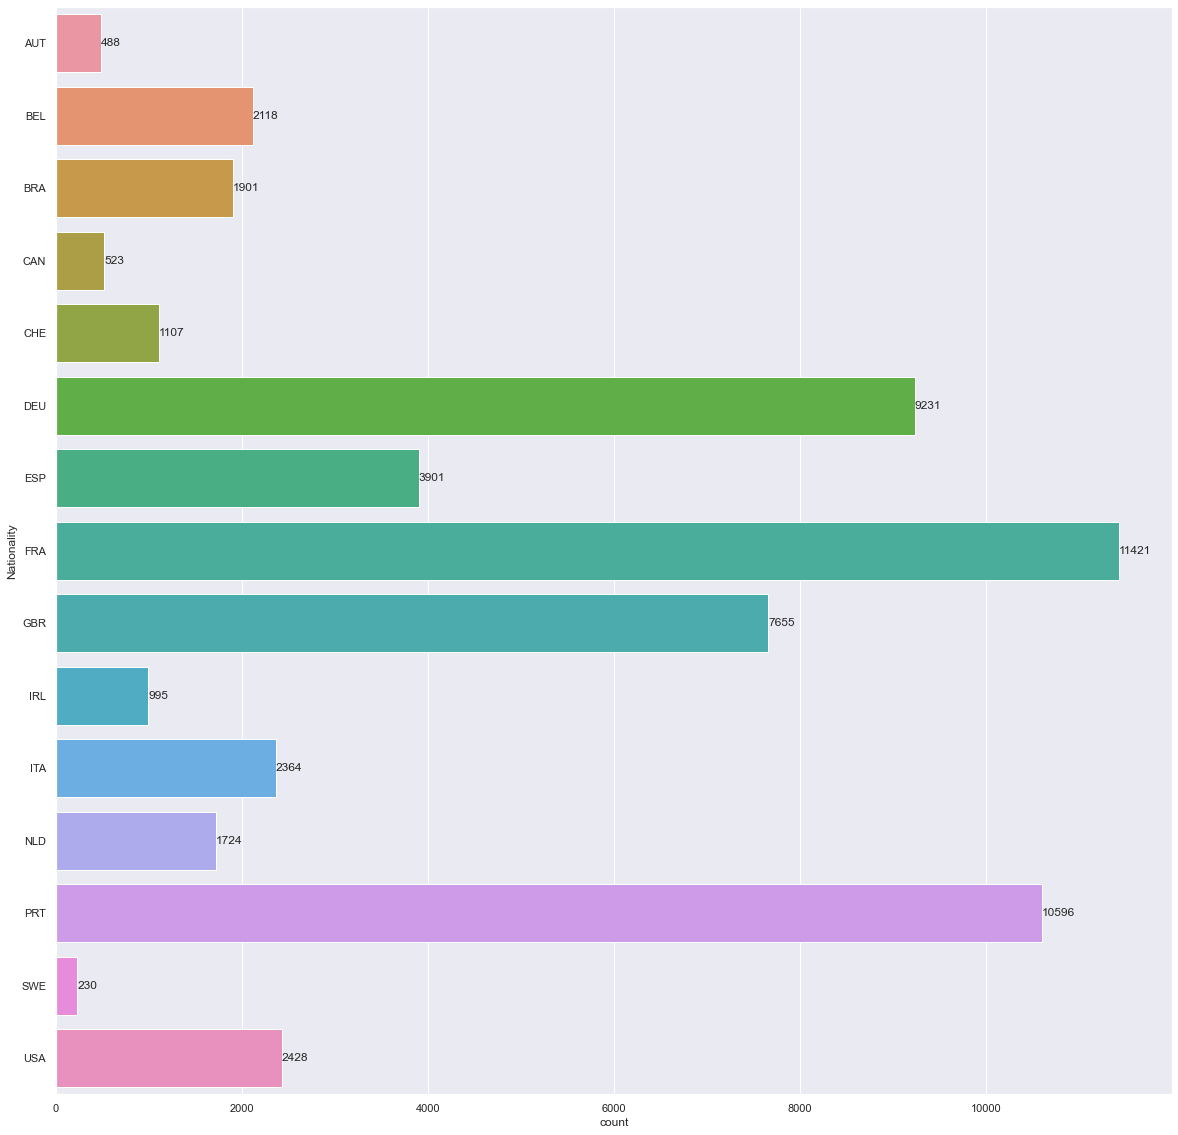

In [187]:
#Visualize the styles and their ratings ocurrance. 
fig, ax = plt.subplots(figsize=(20,20))

Nationalities = top_nationalities.select_dtypes(include = 'object').copy()

#get counts of variables
Nationalities.Nationality.value_counts()

#count plot for one variable
sns.set(rc = {'figure.figsize':(20,30)})
sns.countplot(y= 'Nationality', data = Nationalities)

ax.bar_label(ax.containers[0])

Many of these nationalities are a minor percentage of the total customer base. We can reduce the feature categories by the number of nationaltiies with less than 5% representation to see where that leaves us. This is too many categories to visualize and analyze, we need to lower the category cardinality. Dropping customer

OR

We cluster countries into regions and add a region column. This would be ideal for future use and interpretability. 

OR 

We group the under 1000 customer countries into an "other" 

What does the distribution of top nationalities look like?

In [202]:
top_nationalities.describe()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,percent_nationalities,Count
count,56682.000000,56682.000000,56682.000000,56682.000000,56682.000000,56682.000000,56682.000000,56682.000000,56682.000000,56682.000000,...,56682.000000,56682.000000,56682.000000,56682.000000,56682.000000,56682.000000,56682.000000,56682.000000,5.668200e+04,56682.0
mean,40468.085618,42.834339,472.256413,68.691101,292.536917,69.848855,0.002435,0.000741,0.809693,4.680445,...,0.001923,0.013196,0.343425,0.138880,0.000370,0.003528,0.000053,0.086059,2.249073e-03,83590.0
std,24469.353978,19.519301,319.267180,91.050456,365.635400,119.120630,0.075098,0.031980,0.748129,4.507534,...,0.043810,0.114116,0.474856,0.345824,0.019245,0.059296,0.007275,0.280454,3.014109e-16,0.0
min,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.249073e-03,83590.0
25%,19280.250000,31.000000,185.000000,0.000000,70.400000,4.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.249073e-03,83590.0
50%,39520.500000,45.000000,433.000000,31.000000,230.200000,42.000000,0.000000,0.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.249073e-03,83590.0
75%,61713.750000,56.000000,761.000000,106.000000,390.600000,90.200000,0.000000,0.000000,1.000000,7.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.249073e-03,83590.0
max,83589.000000,92.000000,1095.000000,588.000000,21781.000000,7730.250000,9.000000,3.000000,66.000000,116.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.249073e-03,83590.0


<AxesSubplot:xlabel='Age', ylabel='Nationality'>

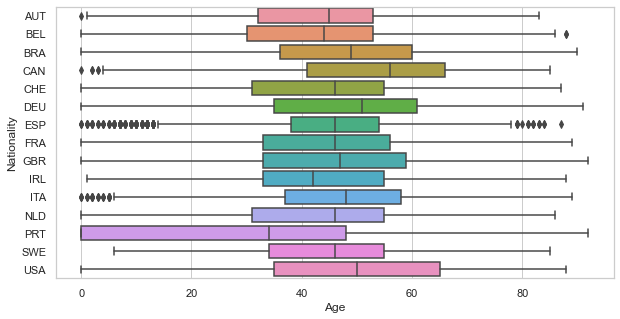

In [199]:
sns.set(rc={"figure.figsize":(10, 5)}, style='whitegrid')

sns.boxplot(x='Age', y="Nationality", data=top_nationalities)

<AxesSubplot:xlabel='LodgingRevenue', ylabel='Nationality'>

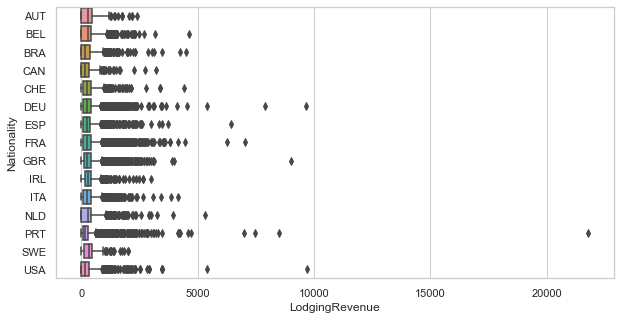

In [204]:
sns.set(rc={"figure.figsize":(10, 5)}, style='whitegrid')

sns.boxplot(x='LodgingRevenue', y="Nationality", data=top_nationalities)

<AxesSubplot:xlabel='OtherRevenue', ylabel='Nationality'>

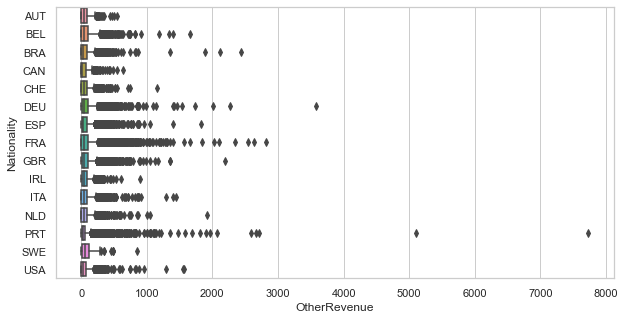

In [205]:
sns.set(rc={"figure.figsize":(10, 5)}, style='whitegrid')

sns.boxplot(x='OtherRevenue', y="Nationality", data=top_nationalities)

<AxesSubplot:xlabel='RoomNights', ylabel='Nationality'>

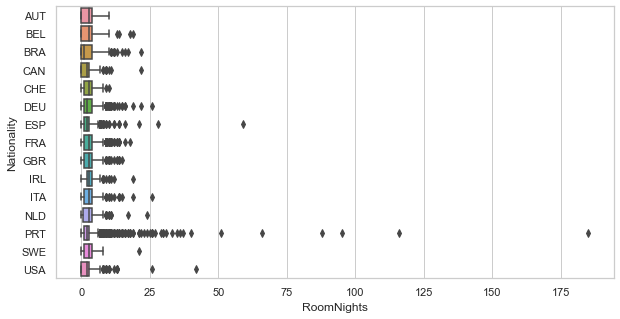

In [206]:
sns.set(rc={"figure.figsize":(10, 5)}, style='whitegrid')

sns.boxplot(x='RoomNights', y="Nationality", data=top_nationalities)

<AxesSubplot:xlabel='DaysSinceLastStay', ylabel='Nationality'>

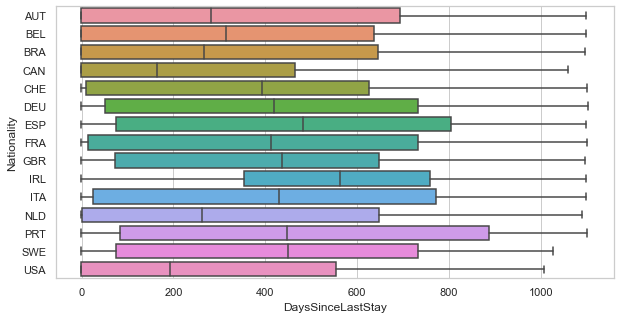

In [207]:
sns.set(rc={"figure.figsize":(10, 5)}, style='whitegrid')

sns.boxplot(x='DaysSinceLastStay', y="Nationality", data=top_nationalities)

<AxesSubplot:xlabel='DaysSinceFirstStay', ylabel='Nationality'>

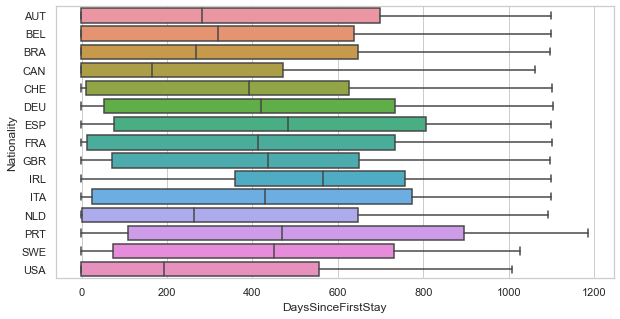

In [208]:
sns.set(rc={"figure.figsize":(10, 5)}, style='whitegrid')

sns.boxplot(x='DaysSinceFirstStay', y="Nationality", data=top_nationalities)

Nationality Correlations

In [ ]:
from bleach import clean


fig, ax = plt.subplots(figsize=(25, 15))

clean_data['NationInt']=(clean_data['Nationality']).astype(int)
clean_corr = clean_data.corr()
sns.heatmap(clean_corr, cmap="Blues", annot= True,
        xticklabels=clean_corr.columns,
        yticklabels=clean_corr.columns)

In [241]:
clean_data = Data.drop(['NationInt'], axis=1)

In [243]:
clean_data.head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,percent_nationalities,Count
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0,0,0.002249,83590
1,2,PRT,0.0,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0.002249,83590
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0.002249,83590
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0.002249,83590
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0.002249,83590


### Distribution Channel

Check for imbalance and correlations in the different ways customers make bookings at the hotel. 

Travel Agent/Operator      68569
Direct                     11912
Corporate                   2600
Electronic Distribution      509
Name: DistributionChannel, dtype: int64


<AxesSubplot:xlabel='count', ylabel='DistributionChannel'>

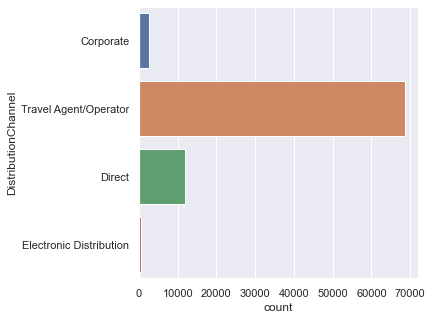

In [267]:
print(clean_data.DistributionChannel.value_counts())


#count plot for one variable
sns.set(rc = {'figure.figsize':(5,5)})
sns.countplot(y= 'DistributionChannel', data = clean_data)

<AxesSubplot:xlabel='Age', ylabel='DistributionChannel'>

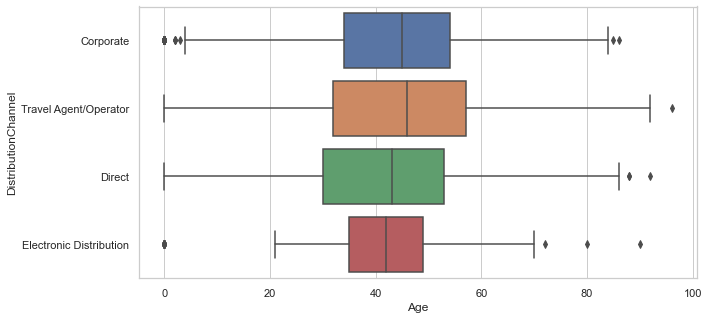

In [248]:
sns.set(rc={"figure.figsize":(10, 5)}, style='whitegrid')

sns.boxplot(x='Age', y="DistributionChannel", data=clean_data)

<AxesSubplot:xlabel='LodgingRevenue', ylabel='DistributionChannel'>

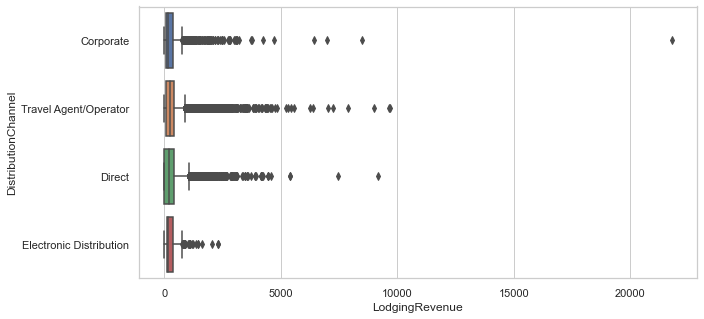

In [251]:
sns.set(rc={"figure.figsize":(10, 5)}, style='whitegrid')

sns.boxplot(x='LodgingRevenue', y="DistributionChannel", data=clean_data)

<AxesSubplot:xlabel='OtherRevenue', ylabel='DistributionChannel'>

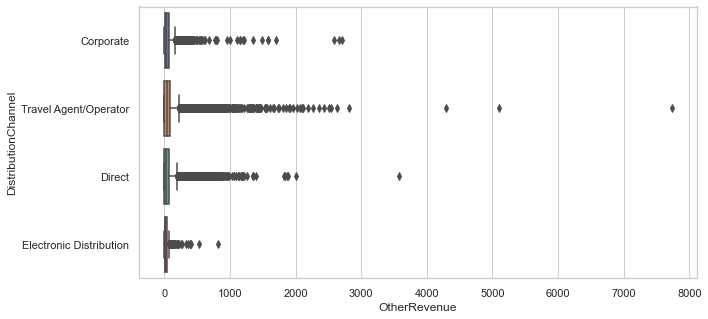

In [252]:
sns.set(rc={"figure.figsize":(10, 5)}, style='whitegrid')

sns.boxplot(x='OtherRevenue', y="DistributionChannel", data=clean_data)

<AxesSubplot:xlabel='RoomNights', ylabel='DistributionChannel'>

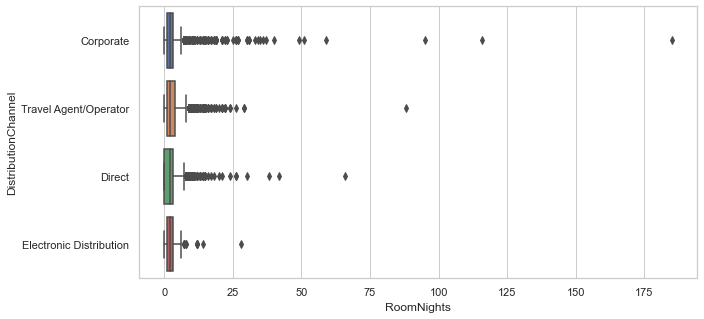

In [253]:
sns.set(rc={"figure.figsize":(10, 5)}, style='whitegrid')

sns.boxplot(x='RoomNights', y="DistributionChannel", data=clean_data)

<AxesSubplot:xlabel='DaysSinceLastStay', ylabel='DistributionChannel'>

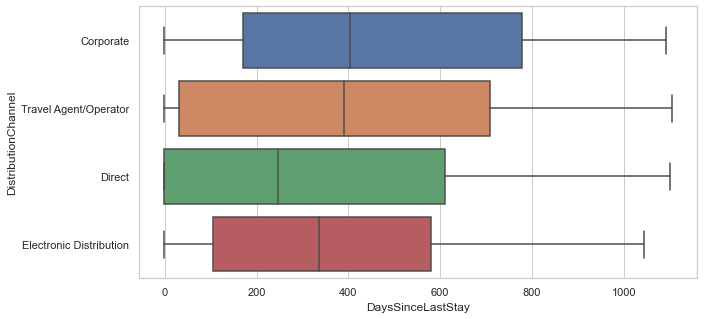

In [254]:
sns.set(rc={"figure.figsize":(10, 5)}, style='whitegrid')

sns.boxplot(x='DaysSinceLastStay', y="DistributionChannel", data=clean_data)

<AxesSubplot:xlabel='DaysSinceFirstStay', ylabel='DistributionChannel'>

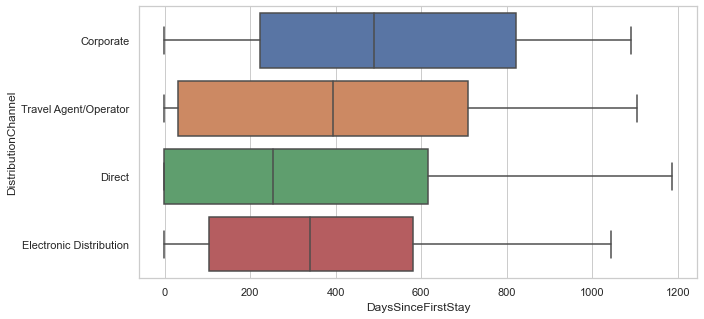

In [255]:
sns.set(rc={"figure.figsize":(10, 5)}, style='whitegrid')

sns.boxplot(x='DaysSinceFirstStay', y="DistributionChannel", data=clean_data)

In [ ]:
from bleach import clean


fig, ax = plt.subplots(figsize=(25, 15))

clean_data['DistroInt']=(clean_data['DistributionChannel']).astype(int)
clean_corr = clean_data.corr()
sns.heatmap(clean_corr, cmap="Blues", annot= True,
        xticklabels=clean_corr.columns,
        yticklabels=clean_corr.columns)

In [249]:
clean_data = Data.drop(['NationInt'], axis=1)

In [250]:
clean_data.head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,percent_nationalities,Count
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0,0,0.002249,83590
1,2,PRT,0.0,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0.002249,83590
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0.002249,83590
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0.002249,83590
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0.002249,83590


### Marketing Segment

Check for imbalance and correlations in the current market segements customers belong to. 

Other                    48039
Travel Agent/Operator    11670
Direct                   11457
Groups                    9501
Corporate                 2169
Complementary              510
Aviation                   244
Name: MarketSegment, dtype: int64


<AxesSubplot:xlabel='count', ylabel='MarketSegment'>

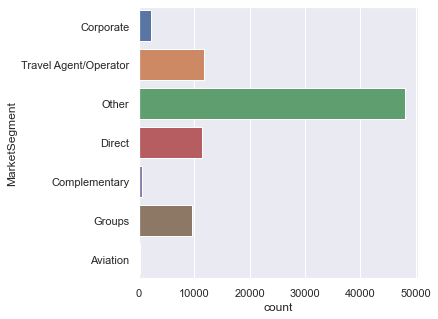

In [269]:
print(clean_data.MarketSegment.value_counts())


#count plot for one variable
sns.set(rc = {'figure.figsize':(5,5)})
sns.countplot(y= 'MarketSegment', data = clean_data)

<AxesSubplot:xlabel='Age', ylabel='MarketSegment'>

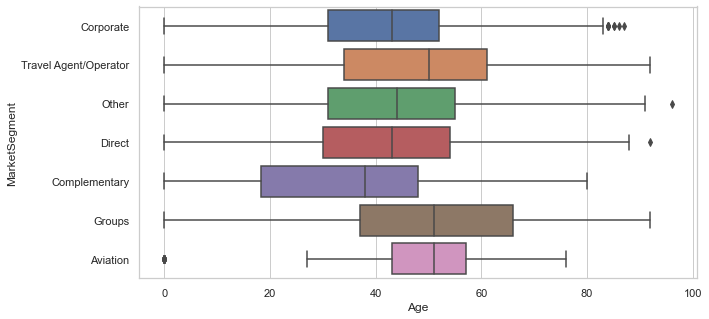

In [270]:
sns.set(rc={"figure.figsize":(10, 5)}, style='whitegrid')

sns.boxplot(x='Age', y="MarketSegment", data=clean_data)

<AxesSubplot:xlabel='LodgingRevenue', ylabel='MarketSegment'>

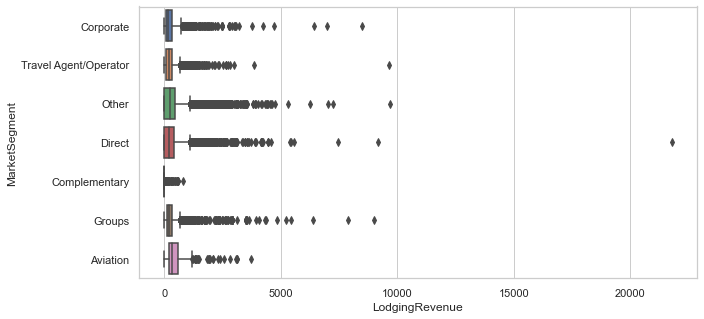

In [272]:
sns.set(rc={"figure.figsize":(10, 5)}, style='whitegrid')

sns.boxplot(x='LodgingRevenue', y="MarketSegment", data=clean_data)

<AxesSubplot:xlabel='OtherRevenue', ylabel='MarketSegment'>

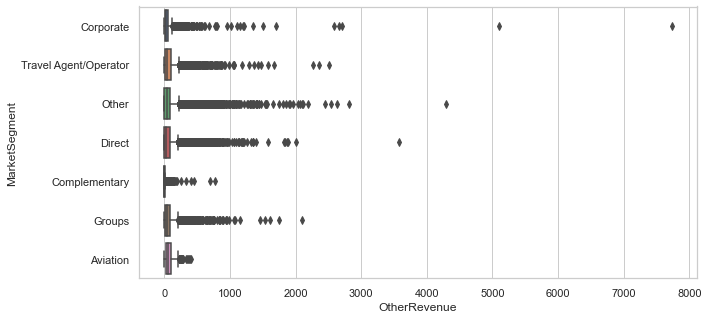

In [273]:
sns.set(rc={"figure.figsize":(10, 5)}, style='whitegrid')

sns.boxplot(x='OtherRevenue', y="MarketSegment", data=clean_data)

<AxesSubplot:xlabel='RoomNights', ylabel='MarketSegment'>

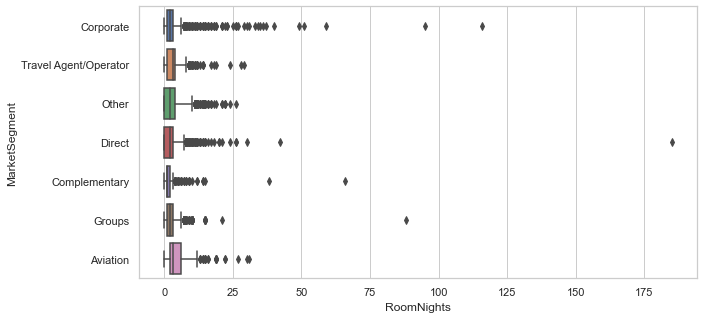

In [274]:
sns.set(rc={"figure.figsize":(10, 5)}, style='whitegrid')

sns.boxplot(x='RoomNights', y="MarketSegment", data=clean_data)

<AxesSubplot:xlabel='DaysSinceLastStay', ylabel='MarketSegment'>

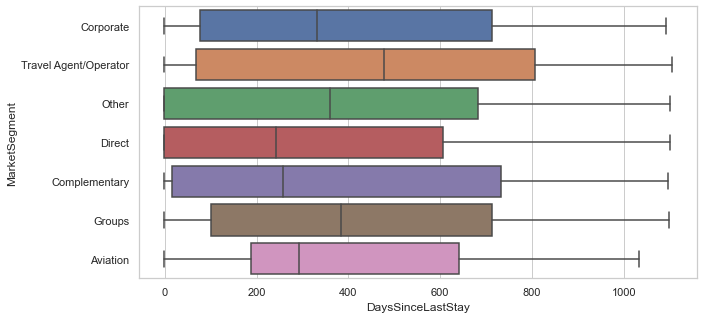

In [275]:
sns.set(rc={"figure.figsize":(10, 5)}, style='whitegrid')

sns.boxplot(x='DaysSinceLastStay', y="MarketSegment", data=clean_data)

<AxesSubplot:xlabel='DaysSinceFirstStay', ylabel='MarketSegment'>

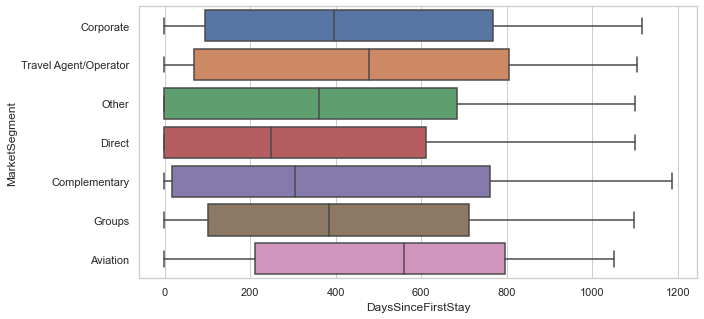

In [271]:
sns.set(rc={"figure.figsize":(10, 5)}, style='whitegrid')

sns.boxplot(x='DaysSinceFirstStay', y="MarketSegment", data=clean_data)

ValueError: invalid literal for int() with base 10: 'Corporate'

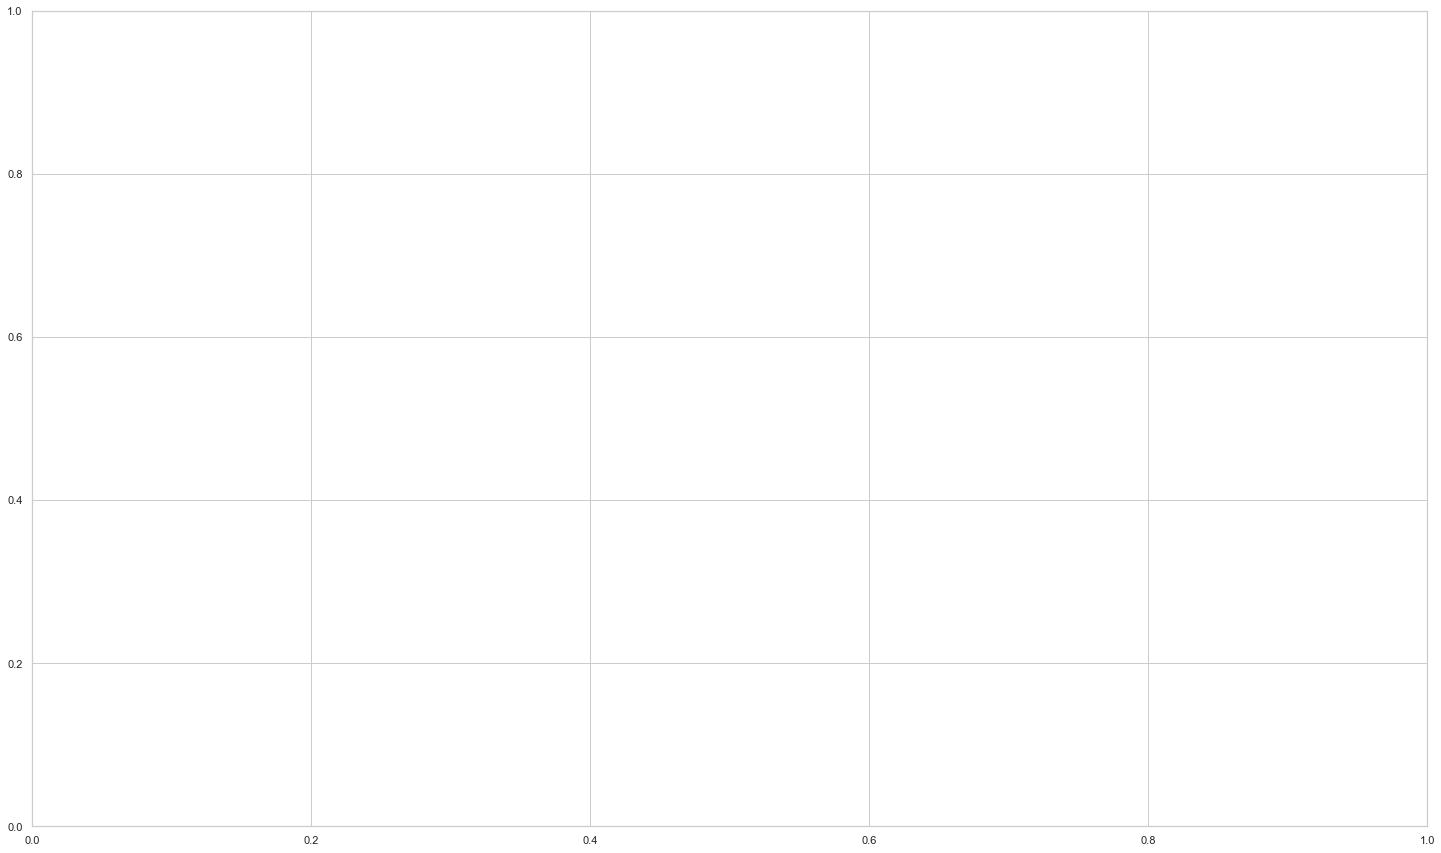

In [305]:
from bleach import clean


fig, ax = plt.subplots(figsize=(25, 15))

clean_data['MarketInt']=(clean_data['MarketSegment']).astype(int)
clean_corr = clean_data.corr()
sns.heatmap(clean_corr, cmap="Blues", annot= True,
        xticklabels=clean_corr.columns,
        yticklabels=clean_corr.columns)

## Numerical feature analysis

In [287]:
clean_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,83590.0,41795.500000,2.413050e+04,1.000000,20898.250000,41795.500000,62692.750000,83590.000000
Age,83590.0,43.336236,1.872854e+01,0.000000,32.000000,45.000000,56.000000,96.000000
DaysSinceCreation,83590.0,453.640902,3.133903e+02,0.000000,177.000000,397.000000,723.000000,1095.000000
AverageLeadTime,83590.0,66.196028,8.775899e+01,-1.000000,0.000000,29.000000,103.000000,588.000000
LodgingRevenue,83590.0,298.802087,3.728519e+02,0.000000,59.000000,234.000000,402.000000,21781.000000
OtherRevenue,83590.0,67.589132,1.143278e+02,0.000000,2.000000,38.500000,87.675000,7730.250000
BookingsCanceled,83590.0,0.002022,6.676992e-02,0.000000,0.000000,0.000000,0.000000,9.000000
BookingsNoShowed,83590.0,0.000634,2.954520e-02,0.000000,0.000000,0.000000,0.000000,3.000000
BookingsCheckedIn,83590.0,0.794617,6.957776e-01,0.000000,1.000000,1.000000,1.000000,66.000000
PersonsNights,83590.0,4.649133,4.567673e+00,0.000000,1.000000,4.000000,6.000000,116.000000


array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DaysSinceCreation'}>,
        <AxesSubplot:title={'center':'AverageLeadTime'}>,
        <AxesSubplot:title={'center':'LodgingRevenue'}>],
       [<AxesSubplot:title={'center':'OtherRevenue'}>,
        <AxesSubplot:title={'center':'BookingsCanceled'}>,
        <AxesSubplot:title={'center':'BookingsNoShowed'}>,
        <AxesSubplot:title={'center':'BookingsCheckedIn'}>,
        <AxesSubplot:title={'center':'PersonsNights'}>],
       [<AxesSubplot:title={'center':'RoomNights'}>,
        <AxesSubplot:title={'center':'DaysSinceLastStay'}>,
        <AxesSubplot:title={'center':'DaysSinceFirstStay'}>,
        <AxesSubplot:title={'center':'SRHighFloor'}>,
        <AxesSubplot:title={'center':'SRLowFloor'}>],
       [<AxesSubplot:title={'center':'SRAccessibleRoom'}>,
        <AxesSubplot:title={'center':'SRMediumFloor'}>,
        <AxesSubplot:title={'center':'SRBathtu

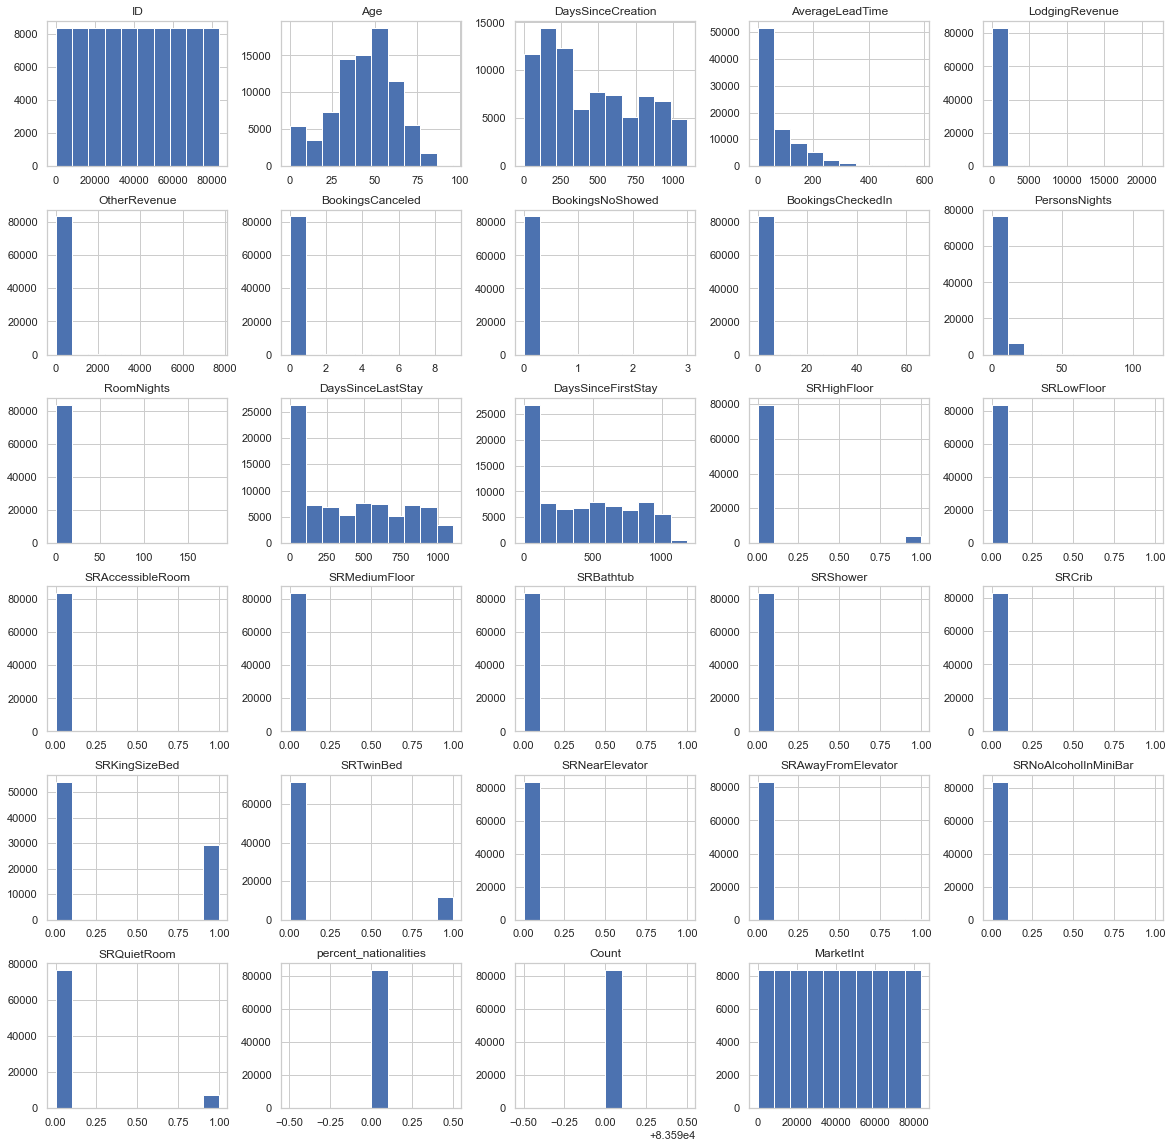

In [286]:
clean_data.hist(figsize=(20,20))

<AxesSubplot:>

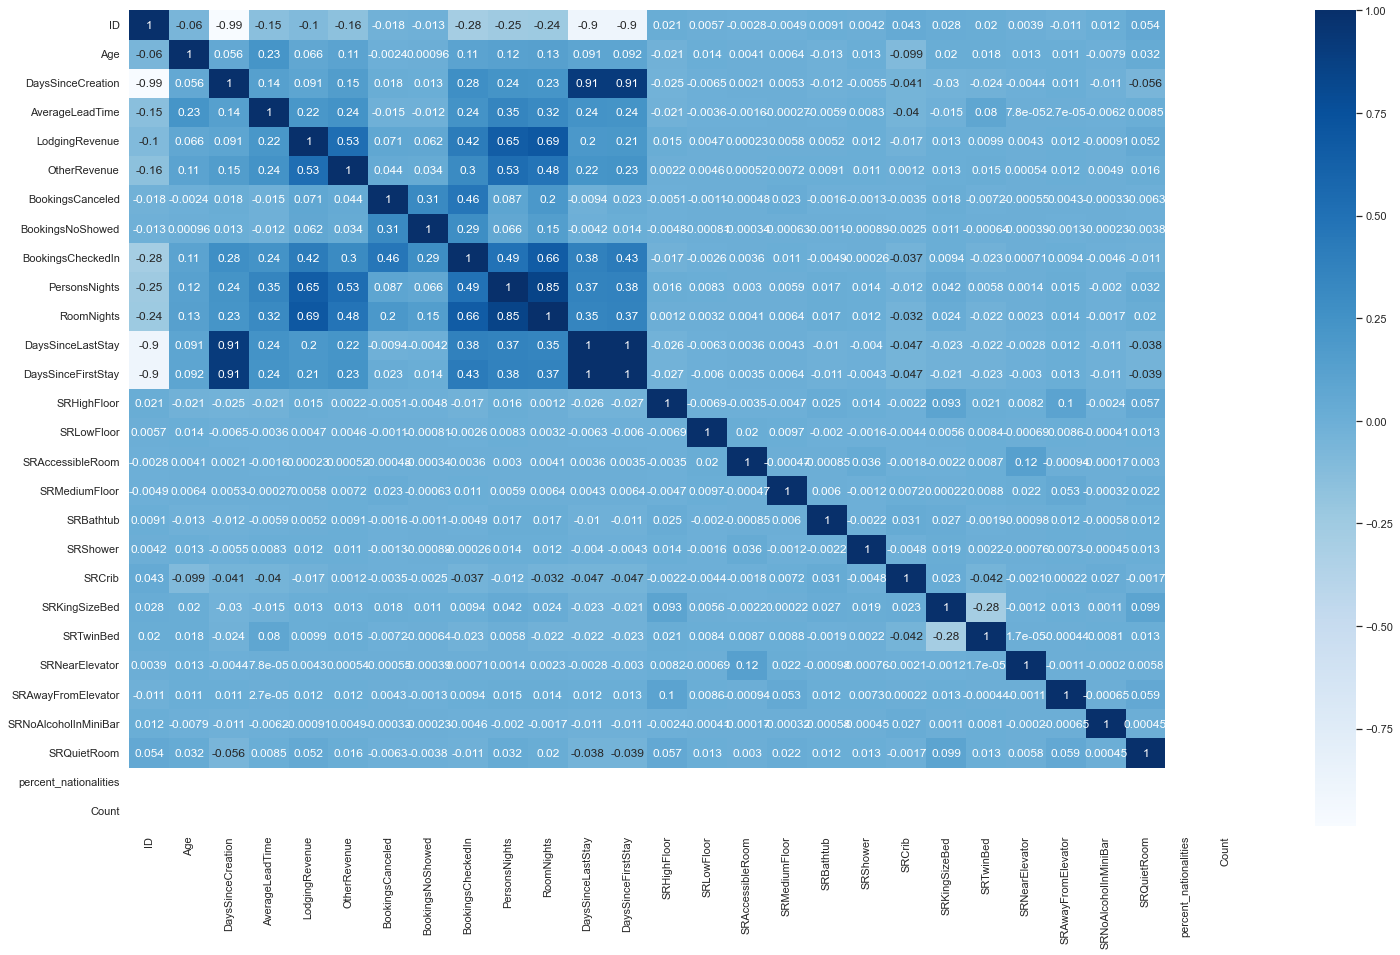

In [277]:
fig, ax = plt.subplots(figsize=(25, 15))

clean_corr = clean_data.corr()
sns.heatmap(clean_corr, cmap="Blues", annot= True,
        xticklabels=clean_corr.columns,
        yticklabels=clean_corr.columns)

No noteworthy correlated numerical pairs to observe. 

_ = plt.plot(clean_data.DaysSinceCreation, clean_data.DaysSinceLastStay,
             marker='.', linestyle='none')
covariance_matrix = np.cov(clean_data.DaysSinceCreation, clean_data.DaysSinceFirstStay)
_ = plt.xlabel('DaysSinceCreation')
_ = plt.ylabel('DaysSinceFirstStay')

print(covariance_matrix)

In [303]:
clean_data['TotalReveneue'] = clean_data['LodgingRevenue'] + clean_data['OtherRevenue']

In [304]:
clean_data.head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,percent_nationalities,Count,MarketInt,TotalReveneue
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0.002249,83590,1,476.3
1,2,PRT,0.0,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,...,0,0,0,0,0,0,0.002249,83590,2,333.0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0.002249,83590,3,0.0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,0,0,0,0,0.002249,83590,4,300.0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0.002249,83590,5,0.0


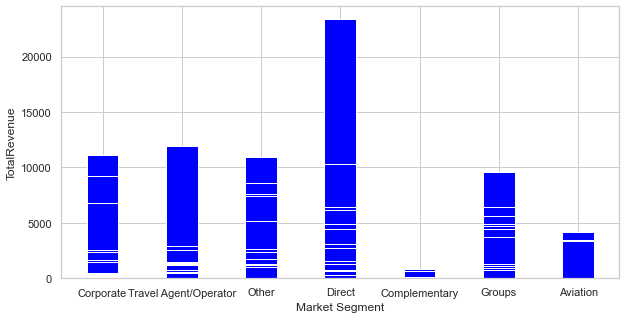

In [311]:
fig = plt.figure(figsize = (10, 5))

plt.bar(clean_data.MarketSegment, clean_data.TotalReveneue, color = 'blue',
        width = .4)

plt.xlabel("Market Segment")
plt.ylabel("TotalRevenue")
plt.show()

In [ ]:
fig = plt.figure(figsize = (10, 5))

plt.bar(clean_data.Age, clean_data.TotalReveneue, color = 'blue',
        width = .4, bins=10)

plt.xlabel("Age")
plt.ylabel("TotalRevenue")
plt.show()

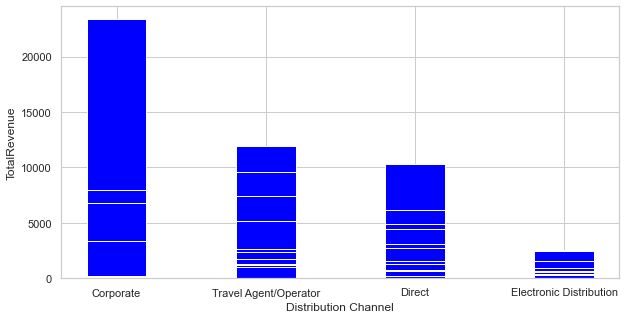

In [312]:
fig = plt.figure(figsize = (10, 5))

plt.bar(clean_data.DistributionChannel, clean_data.TotalReveneue, color = 'blue',
        width = .4)

plt.xlabel("Distribution Channel")
plt.ylabel("TotalRevenue")
plt.show()

In [308]:
clean_data.mean()

c:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



ID                       41795.500000
Age                         43.336236
DaysSinceCreation          453.640902
AverageLeadTime             66.196028
LodgingRevenue             298.802087
OtherRevenue                67.589132
BookingsCanceled             0.002022
BookingsNoShowed             0.000634
BookingsCheckedIn            0.794617
PersonsNights                4.649133
RoomNights                   2.358536
DaysSinceLastStay          401.067137
DaysSinceFirstStay         403.349013
SRHighFloor                  0.047482
SRLowFloor                   0.001412
SRAccessibleRoom             0.000251
SRMediumFloor                0.000873
SRBathtub                    0.002847
SRShower                     0.001711
SRCrib                       0.013219
SRKingSizeBed                0.352686
SRTwinBed                    0.142541
SRNearElevator               0.000335
SRAwayFromElevator           0.003505
SRNoAlcoholInMiniBar         0.000120
SRQuietRoom                  0.088372
percent_nati